In [4]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
# Summary
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from scipy.stats import randint

# tensor-Keras
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools



import warnings
import scipy.io
print("TensorFlow version: ", tf.__version__)

warnings.filterwarnings('ignore')

TensorFlow version:  2.2.0


In [5]:
# import data 
tweets_train= pd.read_table('C:/Users/rzouga/Downloads/Github/NLP/train_tweets.txt', '\t',header=None)
tweets_train = tweets_train[0].str.split(",", n = 1, expand = True) 
tweets_train.columns = ["sentiment", "tweets"]
tweets_test =pd.read_table('C:/Users/rzouga/Downloads/Github/NLP/test_tweets.txt', '\t',header=None)
tweets_test = tweets_test[0].str.split(",", n = 1, expand = True) 
tweets_test.columns = ["sentiment", "tweets"]
# Print the head of df
tweets_train.head(3)

,sentiment,tweets
0,positive,Gas by my house hit $3.39!!!! I'm going to Ch...
1,negative,"Theo Walcott is still shit, watch Rafa and Jo..."
2,negative,"its not that I'm a GSP fan, i just hate Nick ..."


In [6]:
tweets_train.dropna()
tweets_train.drop_duplicates()
tweets_test.dropna()
tweets_test.drop_duplicates()
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
# Spacy preporcessing 
#Stop words
#importing stop words from English language.
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import re 

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer_cleaner(sentence):
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, '', sentence)
    # Normalize text
    sentence = re.sub(r"[^a-zA-Z0-9]", " ", sentence.lower())
    # Remove urls
    sentence = re.sub(r"http\S+|www\S+|https\S+", '', sentence, flags=re.MULTILINE)
    # Remove user @ references 
    sentence = re.sub(r'\@\w+','', sentence)
    # remove old style retweet text "RT"
    sentence= re.sub(r'^RT[\s]+', '', sentence)

    # remove hyperlinks
    sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)

    # remove hashtags
    # only removing the hash # sign from the word
    sentence= re.sub(r'#', '',sentence)
    # Creating our token object, which is used to create documents with linguistic annotations.
    
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return ' '.join(mytokens)
tweets_train['tweets_cleaned'] = tweets_train.tweets.apply(spacy_tokenizer_cleaner)
tweets_test['tweets_cleaned'] = tweets_test.tweets.apply(spacy_tokenizer_cleaner)
from sklearn.preprocessing import OneHotEncoder
X_train= tweets_train['tweets_cleaned']# the features we want to analyze
X_test=tweets_test['tweets_cleaned']
y_train=tweets_train['sentiment']
y_test =tweets_test['sentiment']

#### Create the encoder.
encoder = LabelEncoder()

encoder.fit(y_train)   # Assume for simplicity all features are categorical.

y_train_le = encoder.transform(y_train)
y_test_le = encoder.transform(y_test)
y_train_oh =tf.keras.utils.to_categorical(y_train_le)
y_test_oh = tf.keras.utils.to_categorical(y_test_le)
print("y_train_le",y_train_le.shape)
print("y_test_le",y_test_le.shape)
print("y_train_oh",y_train_oh.shape)
print("y_test_oh",y_test_oh.shape)
print(encoder.classes_)
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Flatten
from numpy import array
import tensorflow as tf

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
layers = tf.keras.layers
# Import relevant classes/functions
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Transform the list of sentences into a list of words
all_words = ' '.join(tweets_train['tweets_cleaned']).split(' ')
#all_words=[w for w in DOC ]
# Get number of unique words
vocab_size = len(set(all_words))
print(vocab_size)

y_train_le (6588,)
y_test_le (1044,)
y_train_oh (6588, 3)
y_test_oh (1044, 3)
['negative' 'neutral' 'positive']
17873


In [7]:
#embeded sentences 
from tensorflow.keras.preprocessing.text import Tokenizer

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
vocab_length = len(word_tokenizer.word_index) + 1
# Prepare the data
embedded_train_data = word_tokenizer.texts_to_sequences(X_train)
#padded sentences 
from nltk.tokenize import word_tokenize
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(X_train, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_train_data= pad_sequences(embedded_train_data, length_long_sentence, padding='post')
# Prepare the labels

# Create the encoder.
encoder = LabelEncoder()

encoder.fit(y_train)   

y_train_le = encoder.transform(y_train)
y_test_le = encoder.transform(y_test)
y_train_oh =tf.keras.utils.to_categorical(y_train_le)
y_test_oh = tf.keras.utils.to_categorical(y_test_le)

train_labels=y_train_oh 
#prep_labels = tf.keras.utils.to_categorical(tweets.sentiment)
print(padded_train_data[0],train_labels[0])
# Print the shapes
print(str(vocab_length))
print(str(length_long_sentence))
print(padded_train_data.shape)
print(train_labels.shape)

[2275  116  257   26 2621    4   12 1993 1084   60    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0] [0. 0. 1.]
17873
42
(6588, 42)
(6588, 3)


In [8]:
#embeded sentences 
from tensorflow.keras.preprocessing.text import Tokenizer
# Prepare the data
embedded_test_data = word_tokenizer.texts_to_sequences(X_test)
#padded sentences 

padded_test_data= pad_sequences(embedded_test_data, length_long_sentence, padding='post')
# Prepare the labels
test_labels=y_test_oh  
#prep_labels = tf.keras.utils.to_categorical(tweets.sentiment)
print(padded_test_data[0],test_labels[0])
# Print the shapes


print(padded_test_data.shape)
print(test_labels.shape)

[  139   207   866     3  1005     6 17502     6     2  3703  3703     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0] [0. 1. 0.]
(1044, 42)
(1044, 3)


# Reduce Overfitting:

## 1-Reduce features 
we will only use 50d for emmbedding 

In [9]:
# custumise our embeded  matrix or import GLOVE that accelearate the training process 
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:/Users/rzouga/Desktop/cv-fr-en/CV+diplome/jobopr/glove.6B/glove.6B.50d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
 # embeddings_dictionary now contains words and corresponding GloVe embeddings for all the words.   

glove_file.close()

In [25]:
X_train_dl= padded_train_data # the features we want to analyze
X_test_dl=padded_test_data
y_train_dl=train_labels
y_test_dl =test_labels
print(X_train_dl.shape , X_test_dl.shape)
print(y_train_dl.shape,y_test_dl.shape)

(6588, 42) (1044, 42)
(6588, 3) (1044, 3)


In [26]:
embedding_matrix = zeros((vocab_length, 50))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#embedding_matrix now contains pretrained word embeddings for the words in our corpus.

# Modeling
## 1-Simple LSTM Architecture

In [27]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout,Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Build and compile the model
wordvec_dim=50
model_Simple_LSTM = tf.keras.Sequential(name='Model_Simple_LSTM')
model_Simple_LSTM.add(layers.Embedding(vocab_length, output_dim=wordvec_dim, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model_Simple_LSTM.add(LSTM(128, return_sequences=False))
model_Simple_LSTM.add(Dense(9))
model_Simple_LSTM.add(Dense(3, activation='softmax'))
model_Simple_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# configure early stopping
es = EarlyStopping(monitor='loss',min_delta=0.00000000000001, patience=10)
history_model_Simple_LSTM =model_Simple_LSTM.fit(X_train_dl, y_train_dl, batch_size=64, epochs=1000, verbose=0,callbacks=[es],validation_split=0.05)

Accuracy_Simple_LSTM_model: 60.727972
loss_Simple_LSTM_model: 244.694185


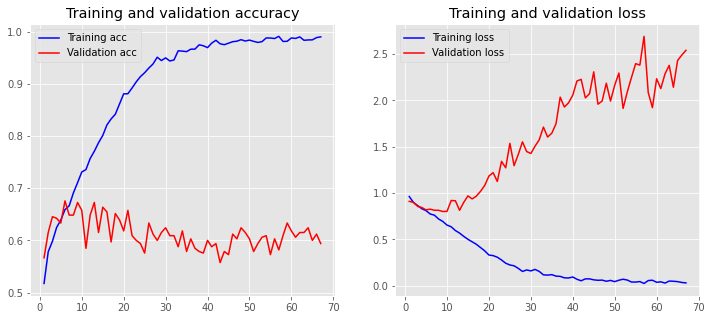

In [28]:
loss_Simple_LSTM, accuracy_Simple_LSTM = model_Simple_LSTM.evaluate( X_test_dl, y_test_dl, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history_model_Simple_LSTM)
print('Accuracy_Simple_LSTM_model: %f' % (accuracy_Simple_LSTM*100))
print('loss_Simple_LSTM_model: %f' % (loss_Simple_LSTM*100))

## 2-Solution via Simple Bidirectional LSTM

Bidirectional LSTM is a type of LSTM which learns from the input sequence from both forward and backward directions. The final sequence interpretation is the concatenation of both forward and backward learning passes. Let's see if we can get better results with bidirectional LSTMs. The following script creates a bidirectional LSTM model with one bidirectional layer and one dense layer which acts as the output of the model.


In [30]:
model_Bi_LSTM = tf.keras.Sequential(name='Model_Bi_LSTM')
model_Bi_LSTM.add(layers.Embedding(vocab_length, output_dim=wordvec_dim, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model_Bi_LSTM.add(layers.Bidirectional(layers.LSTM(128, activation='relu')))
model_Bi_LSTM.add(Dense(9))
model_Bi_LSTM.add(Dense(3, activation='softmax'))
model_Bi_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# configure early stopping
es = EarlyStopping(monitor='loss',min_delta=0.00000000000001, patience=10)
history_model_Bi_LSTM =model_Bi_LSTM.fit(X_train_dl, y_train_dl, batch_size=64, epochs=1000, verbose=0,callbacks=[es],validation_split=0.05)

Accuracy_Bi_LSTM_model: 59.291190
loss_Bi_LSTM_model: 121.172559


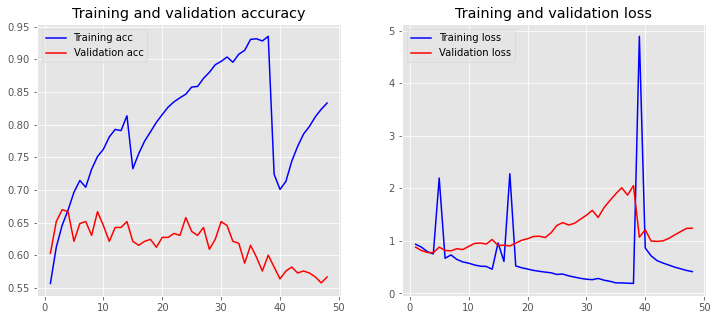

In [33]:
loss_Bi_LSTM, accuracy_Bi_LSTM = model_Bi_LSTM.evaluate( X_test_dl, y_test_dl, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history_model_Bi_LSTM)
print('Accuracy_Bi_LSTM_model: %f' % (accuracy_Bi_LSTM*100))
print('loss_Bi_LSTM_model: %f' % (loss_Bi_LSTM*100))

## 3- Simple CNN-Lstm

In [34]:
#Convolutional neural networks have been found to work well with text data ,the CNN Model for feature extraction 
#LSTM Model for interpreting the features across time steps.
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
wordvec_dim=50
model_CNN_LSTM = tf.keras.Sequential(name='model_CNN_LSTM')
model_CNN_LSTM.add(layers.Embedding(vocab_length, output_dim=wordvec_dim, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model_CNN_LSTM.add(layers.Conv1D(40, 7, activation='relu',padding='same'))
model_CNN_LSTM.add(LSTM(64, return_sequences=False))
model_CNN_LSTM.add(Dense(16))
model_CNN_LSTM.add(Dense(3, activation='softmax'))
model_CNN_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_CNN_LSTM.summary())

Model: "model_CNN_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 42, 50)            893650    
_________________________________________________________________
conv1d (Conv1D)              (None, 42, 40)            14040     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                26880     
_________________________________________________________________
dense_14 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 51        
Total params: 935,661
Trainable params: 42,011
Non-trainable params: 893,650
_________________________________________________________________
None


Accuracy_RNN_model: 54.693484
loss_RNN_model: 315.669394


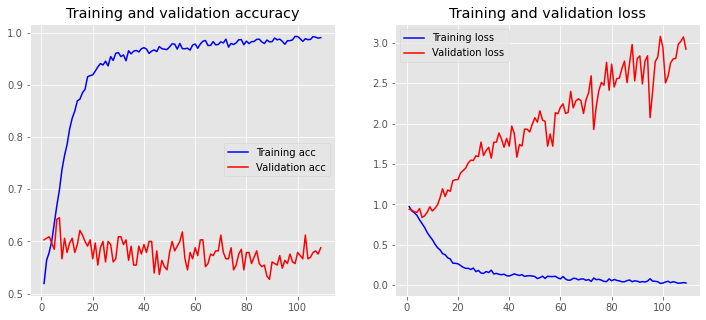

In [35]:
# configure early stopping
es = EarlyStopping(monitor='loss',min_delta=0.00000000000001, patience=10)
history_model_CNN_LSTM =model_CNN_LSTM.fit(X_train_dl, y_train_dl, batch_size=64, epochs=1000, verbose=0,callbacks=[es],validation_split=0.05)
loss_CNN_LSTM, accuracy_CNN_LSTM = model_CNN_LSTM.evaluate( X_test_dl, y_test_dl, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history_model_CNN_LSTM )
print('Accuracy_RNN_model: %f' % (accuracy_CNN_LSTM *100))
print('loss_RNN_model: %f' % (loss_CNN_LSTM *100))